In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import pandas.api.types as ptypes
import math

In [35]:
#load csv file 
df_original = pd.read_csv('weatherHistory.csv')
df = df_original
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [36]:
print("\nType of DF: ",type(df))
print("\nColumns are: \n",df.columns)
print("\n Shape of dataset(rows and columns): \n", df.shape)


Type of DF:  <class 'pandas.core.frame.DataFrame'>

Columns are: 
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

 Shape of dataset(rows and columns): 
 (96453, 12)


In [37]:
# describe dataframe as in transpose form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [38]:
print("\nDrop unwanted columns")
# Pandas Extracting rows using .loc()
df = df.loc[:,['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)',
                                   'Visibility (km)', 'Pressure (millibars)','Apparent Temperature (C)', ]]
df.head()


Drop unwanted columns


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778


In [39]:
print("\nData type of each column:\n")
df.dtypes


Data type of each column:



Temperature (C)             float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Apparent Temperature (C)    float64
dtype: object

In [40]:
#check null values in each column
print("\nNull values in dataset:\n")
df.isnull().sum()



Null values in dataset:



Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Apparent Temperature (C)    0
dtype: int64

In [7]:
# check minimum column data in each col
df.min()

Temperature (C)            -21.822222
Humidity                     0.000000
Wind Speed (km/h)            0.000000
Wind Bearing (degrees)       0.000000
Visibility (km)              0.000000
Pressure (millibars)         0.000000
Apparent Temperature (C)   -27.716667
dtype: float64

In [8]:
print("\n check for duplicate \n")
df.duplicated().sum()


 check for duplicate 



73

In [9]:
print("Remove duplicate ")
df.drop_duplicates(keep= False, inplace = True)

df.duplicated().sum()

Remove duplicate 


0

In [10]:
# rename columns 
df.rename(columns={'Temperature (C)': 'x1', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
                   'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5','Pressure (millibars)':'x6',
                   'Apparent Temperature (C)':'y'}, inplace=True)
print("\nRename Columns:\n")
df.head()


Rename Columns:



,x1,x2,x3,x4,x5,x6,y
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778


In [11]:
# describe dataframe as in transpose form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96307.0,11.940113,9.543567,-21.822222,4.727778,12.011111,18.838889,39.905556
x2,96307.0,0.734727,0.195454,0.000000,0.600000,0.780000,0.890000,1.000000
x3,96307.0,10.819275,6.912023,0.000000,5.844300,9.982000,14.135800,63.852600
x4,96307.0,187.521821,107.359643,0.000000,116.000000,180.000000,290.000000,359.000000
x5,96307.0,10.353050,4.188517,0.000000,8.355900,10.046400,14.812000,16.100000
x6,96307.0,1003.296306,116.699123,0.000000,1011.890000,1016.440000,1021.090000,1046.380000
y,96307.0,10.861837,10.690224,-27.716667,2.327778,12.011111,18.838889,39.344444


In [12]:
# seperate data set
def features(df):
    y_new = df.y
#     y.head()
    df = df.drop('y', axis = 1)
    return df, y_new

In [13]:
df, y_new = features(df)

In [14]:
print('Head for df')
df.head()

Head for df


,x1,x2,x3,x4,x5,x6
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [15]:
print('Head for y')
y_new.head()

Head for y


0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: y, dtype: float64

<Figure size 432x288 with 0 Axes>

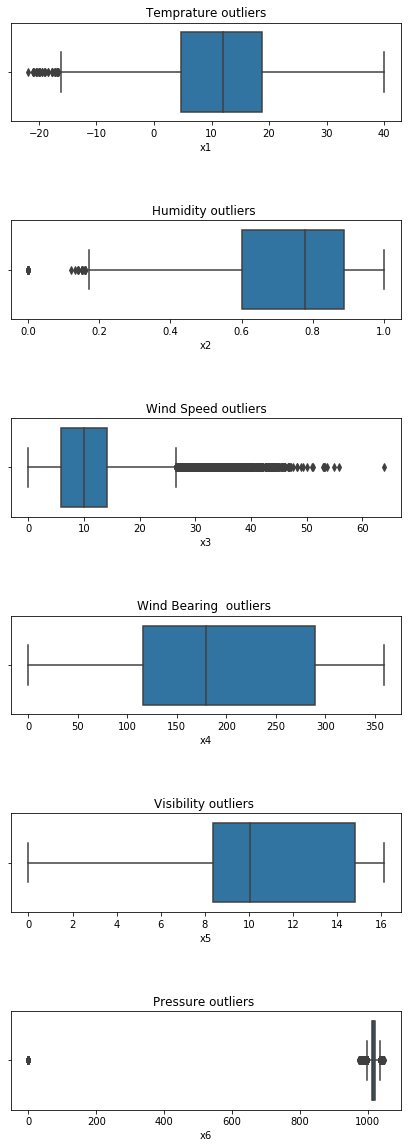

In [16]:
def check_outliers():
       
          # Create a figure instance, and the two subplots
        fig = plt.figure()
        # here we show 4 axes
        fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(7, 20))

        sb.boxplot(df['x1'], ax = ax1)
        ax1.set_title("Temprature outliers")
        
        sb.boxplot(df['x2'], ax = ax2)
        ax2.set_title("Humidity outliers ")
        
        sb.boxplot(df['x3'], ax = ax3)
        ax3.set_title(" Wind Speed outliers ")
        
        sb.boxplot(df['x4'], ax = ax4)
        ax4.set_title("Wind Bearing  outliers ")
        
        sb.boxplot(df['x5'], ax = ax5)
        ax5.set_title("Visibility outliers ")
        
        sb.boxplot(df['x6'], ax = ax6)
        ax6.set_title("Pressure outliers ")
        
        plt.subplots_adjust(hspace=1)
        plt.show()


# # Tell pointplot to plot on ax1 with the ax argument
# sns.pointplot(x="x", y="y", data=data, ax=ax1)
        
check_outliers()

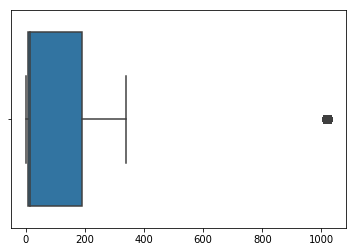

In [17]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
# remove outliers
def remove_outlier(df):
    # low and high percentiles should all be in the interval [0, 1]
        low = .11
        high = .95
        quant_df = df.quantile([low, high])
        for name in list(df.columns):
            if ptypes.is_numeric_dtype(df[name]):
                df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
        sb.boxplot(df) 
        
remove_outlier(df)


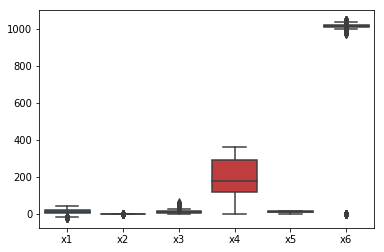

In [18]:
sb.boxplot(data = df)
plt.show()


 Mean: 
 x1      11.940113
x2       0.734727
x3      10.819275
x4     187.521821
x5      10.353050
x6    1003.296306
dtype: float64 

Skew : 
 x1    0.094236
x2   -0.715681
x3    1.113451
x4   -0.154675
x5   -0.498227
x6   -8.442908
dtype: float64 

Median: 
 x1      12.011111
x2       0.780000
x3       9.982000
x4     180.000000
x5      10.046400
x6    1016.440000
dtype: float64


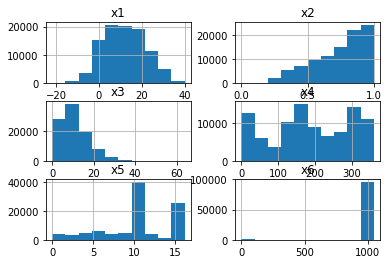

In [19]:
def check_skew(df):
        """If skewness value lies above +1 or below -1, data is highly skewed. 
        If it lies between +0.5 to -0.5, it is moderately skewed. 
        If the value is 0, then the data is symmetric"""
        
        print("\n Mean: \n",df.mean(), "\n\nSkew : \n",df.skew(), "\n\nMedian: \n", df.median())
        df.hist()

check_skew(df)            

In [20]:
# x2   -0.715681
def remove_skew_square():
    print("\nSkewness for x2")
#         df['x2'] = (np.square(df['x2']))
    df['x2'] = (np.square(df['x2']))
    print('Skewness is :', df['x2'].skew())
    sb.distplot(df['x2'])
    plt.show()
    print("Mean: ",df['x2'].mean(),"Median: ", df['x2'].median())
#         self.df['Humi'] = target
    print("Draw histogram")
    plt.hist(df['x2'])
    plt.show()
        
    print("\nSkewness for x2")
#         df['x2'] = (np.square(df['x2']))
    df['x2'] = (np.square(df['x2']))
    print('Skewness is :', df['x2'].skew())
    sb.distplot(df['x2'])
    plt.show()
    print("Mean: ",df['x2'].mean(),"Median: ", df['x2'].median())
#         self.df['Humi'] = target
    print("Draw histogram")
    plt.hist(df['x2'])
    plt.show()
      
        
# remove_skew_square()
# If the tail is to the left of data, then it is called left skewed data. 
# It is also called negatively skewed data.
# Common transformations include square , cube root and logarithmic.

# If tail is on the right as that of the second image in the figure, it is right skewed data. 
#     It is also called positive skewed data.
#     Common transformations of this data include square root, cube root, and log.

In [21]:
df_original.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [22]:
# rename columns 
df_original.rename(columns={'Apparent Temperature (C)':'y'}, inplace=True)
print("\nRename Columns:\n")
df_original.head()


Rename Columns:



,Formatted Date,Summary,Precip Type,Temperature (C),y,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [23]:
#     Cube root transformation:(to remove right skew) 
#The cube root transformation involves converting x to x^(1/3).
#x3    1.113451
def remove_skew_cbrt():
    print("\nSkewness for x3")
#         df['x2'] = (np.square(df['x2']))
    df['x3'] = (np.sqrt(df['x3']))
    print('Skewness is :', df['x3'].skew())
    sb.distplot(df['x3'])
    plt.show()
    print("Mean: ",df['x3'].mean(),"Median: ", df['x3'].median())
#         self.df['Humi'] = target
    print("Draw histogram")
    plt.hist(df['x3'])
    plt.show()
    
    print("\nSkewness for x3")
#         df['x2'] = (np.square(df['x2']))
    df['x3'] = (np.cbrt(df['x3']))
    print('Skewness is :', df['x3'].skew())
    sb.distplot(df['x3'])
    plt.show()
    print("Mean: ",df['x3'].mean(),"Median: ", df['x3'].median())
#         self.df['Humi'] = target
    print("Draw histogram")
    plt.hist(df['x3'])
    plt.show()
    
        
# remove_skew_cbrt()


In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
type(df_original)

pandas.core.frame.DataFrame

In [26]:
def split(df,y_new):
    train_per = int(0.70*len(df))
    test_per = len(df)-train_per
        # display data
    print("\nTraining set")
    print(train_per)
    print("\nTest data set")
    print(test_per)
    
    print("Convert pandas dataframe into numpy")
       
#     x_train_data = np.array(df.x1,df.x2,df.x3,df.x4,df.x5,df.x6[:train_per]) 

    # divide the data into train and test dataset before converting it into numpy
    
    x_train = df[:train_per]
    x_test = df[:test_per]
    
    x_train_data = np.array(df[:train_per])   

    x_test_data = np.array(df[:test_per])

    ##############################################################
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y
    
    y_train = df[:train_per_y]
    y_test = df[:test_per_y]
    
    y_train_data = np.array(df_original.y[:train_per_y])
    y_test_data = np.array(df_original.y[:test_per_y])
    
#     y_train_data = np.array(y_new[:train_per_y])
#     y_test_data = np.array(y_new[:test_per_y])
       
      
    return x_train_data,y_train_data,x_test_data,y_test_data,


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96307 entries, 0 to 96452
Data columns (total 6 columns):
x1    96307 non-null float64
x2    96307 non-null float64
x3    96307 non-null float64
x4    96307 non-null float64
x5    96307 non-null float64
x6    96307 non-null float64
dtypes: float64(6)
memory usage: 5.1 MB


In [28]:
x_train_data,y_train_data,x_test_data,y_test_data,  = split(df,y_new)


Training set
67414

Test data set
28893
Convert pandas dataframe into numpy


In [29]:
y_train_data.shape

(67414,)

In [30]:
x_train_data.shape

(67414, 6)

In [31]:
def feature_scaling(df):
    print("\n By Z score Method(Standerdization)")
    df = np.divide((df - df.mean()),df.std())
    print(df.head())

In [33]:
# feature_scaling(df)

X train shape original (67414, 6)

theat shape  (7, 1)
x_train shape  (67414, 7)


hypo_multiplication shape (1, 67414)
error shape (1, 67414)
CF (1, 7)
theta shape (1, 7)

cost temp (1, 67414)
last cf shape: (1, 67414)

cost shape: (1, 67414)

theta shape: (1, 7)

x_test_data shape: (28893, 7)
y predict (1, 28893)
y (28893,)


IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 432x288 with 0 Axes>

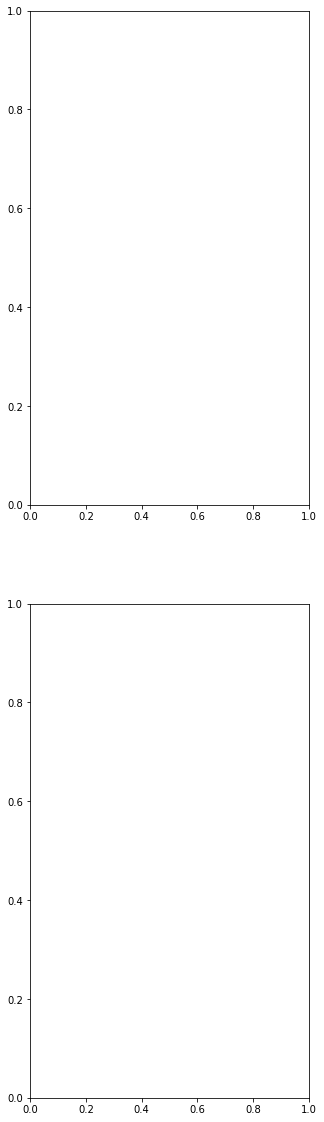

In [43]:
class MultiLR:
    def __init__(self):
         # learning_rate is a alpha
        self.learning_rate = 0.01
        self.epoch = 10000
        self.ncols=6
        
    def gradient_descent(self,x_train_data, y_train_data, theta_vector):
        print("\ntheat shape ",theta_vector.shape)
        print("x_train shape ",x_train_data.shape)
        
        cost = 0
            
        fig = plt.figure()
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 20))
        
        size = len(x_train_data)
#         vector = np.ones(size)
        cf = 0.0
        cost_temp = 0.0
        error = 0.0
        for iteration in range(self.epoch):
#             hypo = ((self.theta_0 * vector[row])  + (self.theta_1 * x_train_data[row]))
            # or use np.dot
            hypo = np.dot(theta_vector.T, x_train_data.T)
            error = np.subtract(hypo, y_train_data)
            cf = np.dot(error, x_train_data)
            div = np.divide(self.learning_rate, size)
            temp = np.dot(div, cf)
            theta = np.subtract(theta_vector.T, temp)

            # CF = 1/ 2m (summession of i 1 to m) [h(x) - y)]^2
            cost_temp += np.power(np.subtract(hypo, y_train_data),2) 
            cost = np.dot((1/2 * size), cost_temp)


        print("\n\nhypo_multiplication shape",hypo.shape)  
        print("error shape", error.shape)
        print("CF", cf.shape)
        print("theta shape", theta.shape)
        
        print("\ncost temp", cost_temp.shape)  
        print("last cf shape:", cost.shape)
#               cost = np.multiply((1/2 * size), cost_temp)
#             print("last cf shape:", cost.shape)
#             theta_vector = np.subtract(theta_vector, (np.multiply((self.learning_rate/ size), error)))
#             print("theta shape", theta_vector)

#             self.theta_1 = self.theta_1 -((self.learning_rate/ size)* hypo_2)
#             Ypred = self.classify(x_train_data)
#             diff = np.subtract(Ypred,y_train_data)
            
#             # cost = sum(y^ -y)**2)/2m
#             cost = np.sum(np.square(diff))/(2*size)
                          
#             if(iteration%50==0):
#                 # plt.plot(counter,loss_error_sum, marker='x', color='r')
#                 ax1.plot(iteration,theta,marker='o',color='r')
#                 ax1.set_title('iteration vs theta')

# #                 ax2.plot(iteration,self.theta_1,marker='+',color='g')
# #                 ax2.set_title('iteration vs theta 1')
                
#                 ax2.plot(iteration,cost,marker='*',color='b')
#                 ax2.set_title('iteration vs cost')

#                 plt.subplots_adjust(hspace=1)
#                 plt.show()
#                 print("iteration = {} and cost function = {}".format(iteration, cost))
#                 print('In training iteration: {}, cost {}, Theta_0:{}'.format(iterations, cost, self.theta_0 )) 
#             for row in range(0, self.ncols):
#                 self.theta_1[row] = np.subtract(self.theta_1[row],np.multiply(self.learning_rate,np.sum(
#                         np.multiply(diff,x_train_data.iloc[:,row]))))
    
#             self.theta_1 = np.divide(self.theta_1,size)
#             self.theta_0 = np.subtract(self.theta_0,np.multiply(self.learning_rate,(np.sum(diff)/size)))
            
        return theta, cost           

    def predict (self,x_test_data,theta):
        print("\nx_test_data shape:",x_test_data.shape)
        n = len(x_test_data)
#         y_predict = [None]*n
        y_predict = np.dot(theta, x_test_data.T) 
        print("y predict", y_predict.shape)

        return y_predict
    
#     # y_prediction for test dataset
#     def predict_new(self, x_train_data,theta):
        
#         n = len(x_train_data)
#         y_predict_train = [None]*n
# #         vector = np.ones(n)
# #         for row in range (n):
#         y_predict_train = np.dot(theta, x_train_data.T) 
#             #for train
#         print("\ny_predict for train shape", y_predict_train.shape)
#         return y_predict_train
   
     
    def accuracy(self, y_test_data, y_predict):
        print("y", y_test_data.shape)
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100
    


    # scatter plot on x_test y_test data vs x_test y_pre      
    def graph(self, x_train_data, y_train_data, y_predict): 
        print(len(x_train_data))
        print(len(y_train_data))
        print(len(y_predict))
        
        plt.scatter(x_train_data, y_train_data , color = 'b', label = "train data set")
        plt.plot(x_train_data, y_predict, color = 'r', label = "predicted value")
        plt.title("Train data")
#         plt.subplot(2,2,1)
        
        plt.legend()
        plt.show()
        
    # scatter plot on x_test_data, y_test_data data vs x_test y_pre   
    def plotgraph(self, x_test_data, y_test_data, y_predict):
        print(len(x_test_data))
        print(len(y_test_data))
        print(len(y_predict))
        
        plt.scatter(x_test_data, y_test_data , color = 'g', label = "test data")
        plt.plot(x_test_data, y_predict,color = 'r', label = "predicted value")

        plt.title("Test data")
#         plt.subplot(2,2,1)
        plt.legend()
        
        plt.show()
        
    
def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
    # class obj created
    obj = MultiLR()
    
    print("X train shape original", x_train_data.shape)
    
    x_size = 6
    theta_vector = np.zeros(((x_size + 1), 1), dtype='f')
   
    # append new col bcoz we have 6 features as, x1,x2,....x6 but 7 thetas so add new x(np.opnes)
    # unction is used to stack 1-D arrays as columns into a 2-D array
    # Stacking the two arrays   
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))

    theta, cost = obj.gradient_descent(x_train_data, y_train_data, theta_vector)
    print("\ncost shape:", cost.shape)
    print("\ntheta shape:", theta.shape)
    
    y_predict = obj.predict(x_test_data, theta)
#     print()
    
    acc = obj.accuracy(y_test_data, y_predict)
    print("Accuracy", acc)

#     yy = obj.predict_new(x_train_data,theta)

    #train data set
    obj.graph(x_train_data, y_train_data , yy)
    #test dataset
    obj.plotgraph( x_test_data, y_test_data, y_predict)



if __name__ == '__main__':
    main(df, x_train_data,y_train_data,x_test_data,y_test_data)

In [ ]:
# main(df, x_train_data,y_train_data,x_test_data,y_test_data)

In [ ]:
# theta, cost = obj.gradient_descent(x_train_data, y_train_data)